In [2]:
# CLUSTERING ANALYSIS - EASTWEST AIRLINES
# This notebook answers the clustering-related tasks from the provided document using
# the EastWestAirlines dataset.

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [3]:
# Step 2: Load dataset
df = pd.read_excel(r"C:\Users\CS\Desktop\EastWestAirlines.xlsx", sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

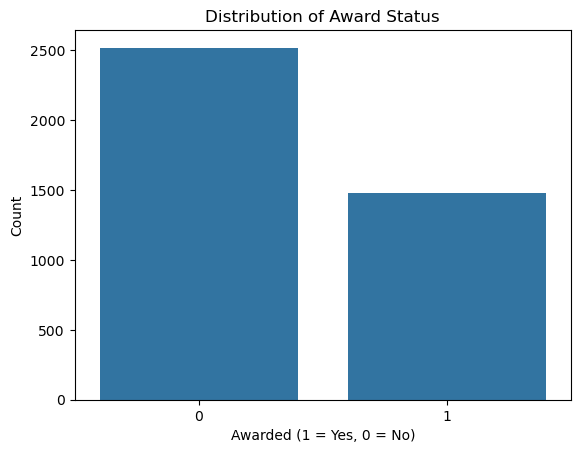

In [6]:

# Plot the distribution of the 'Award?' column
sns.countplot(x='Award?', data=df)
plt.title("Distribution of Award Status")
plt.xlabel("Awarded (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


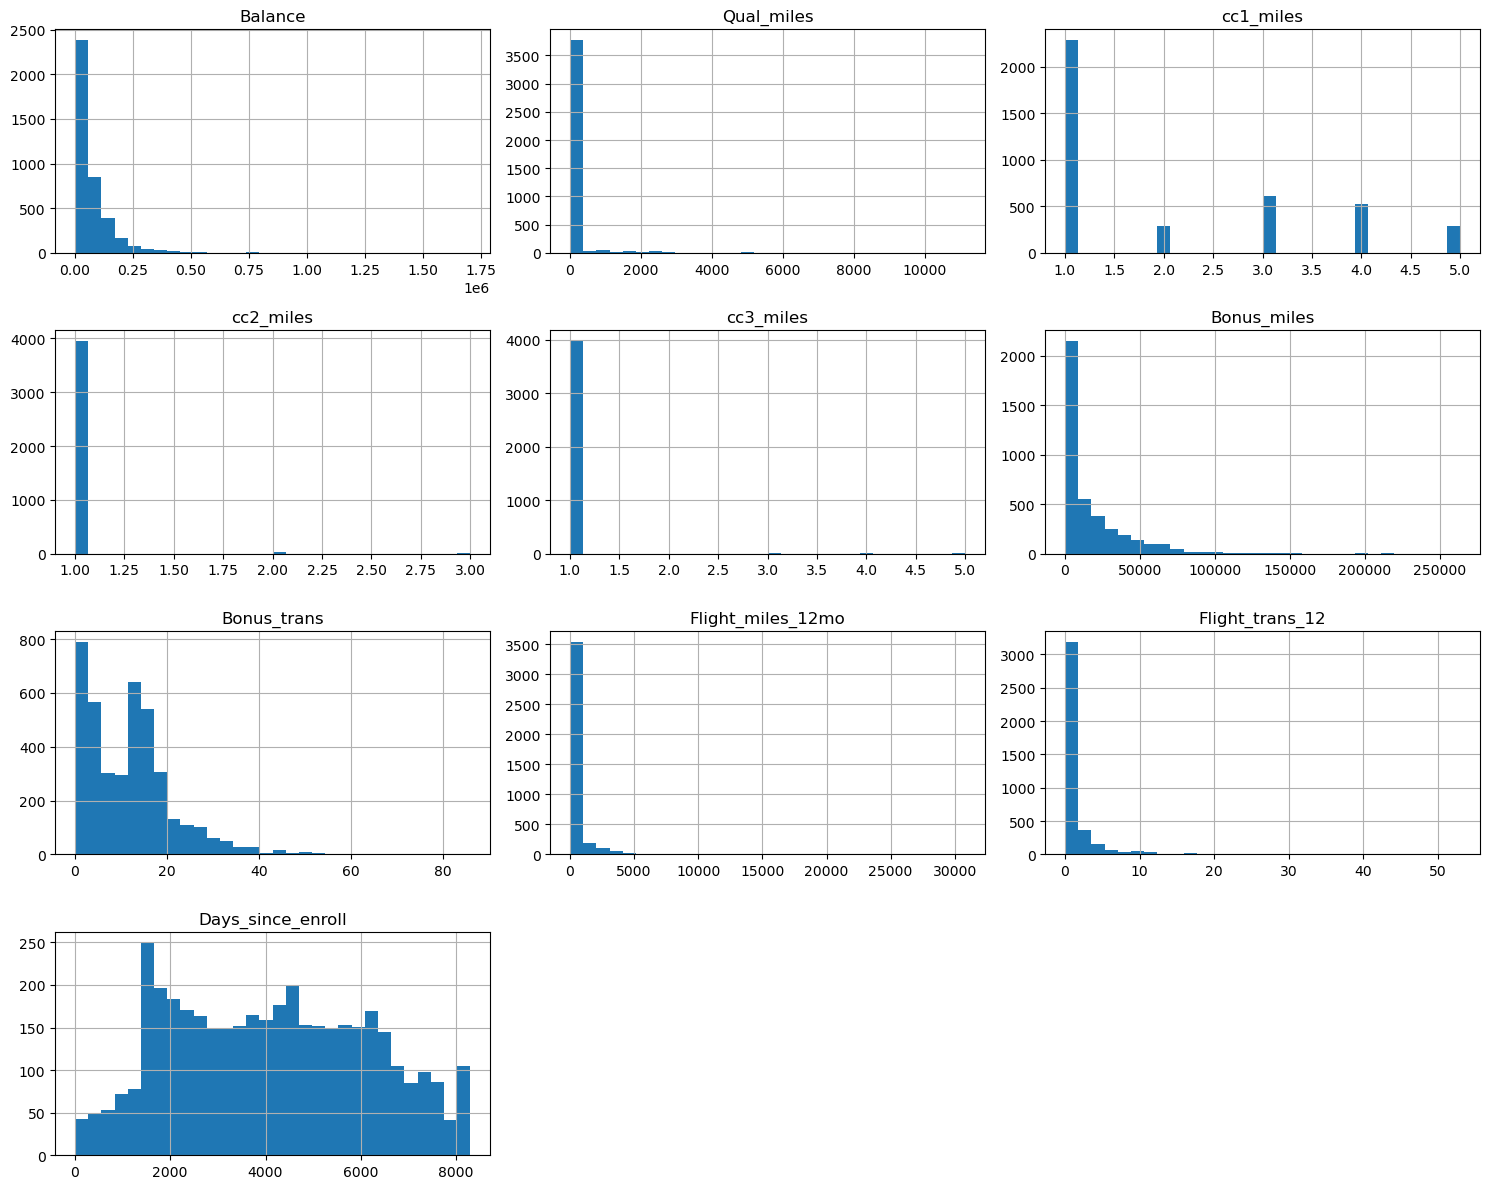

In [7]:
# Plotting histograms for numerical columns
num_cols = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
            'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo',
            'Flight_trans_12', 'Days_since_enroll']

df[num_cols].hist(bins=30, figsize=(15, 12), layout=(4, 3))
plt.tight_layout()
plt.show()


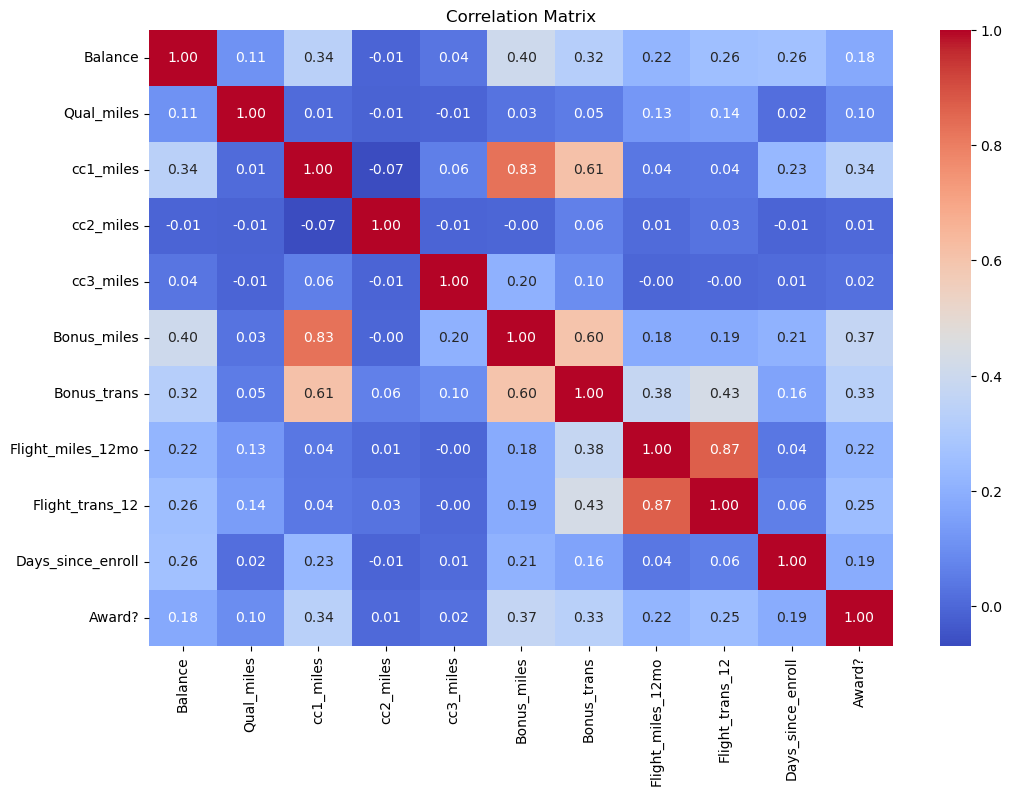

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols + ['Award?']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


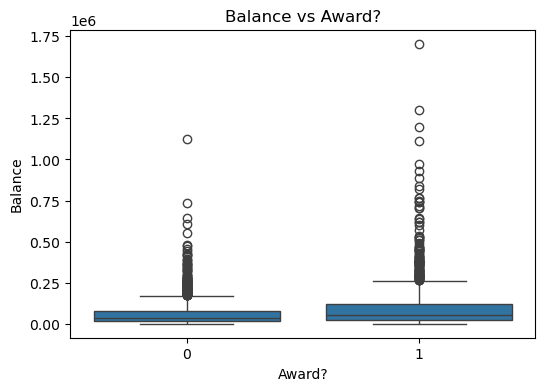

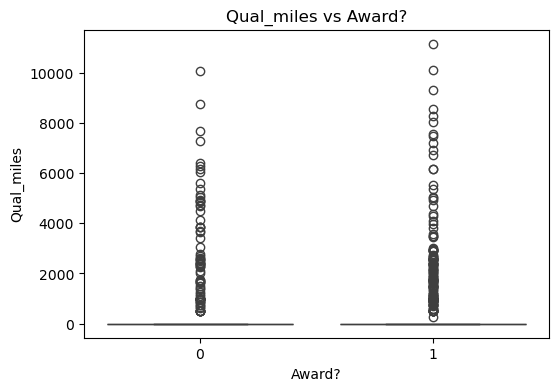

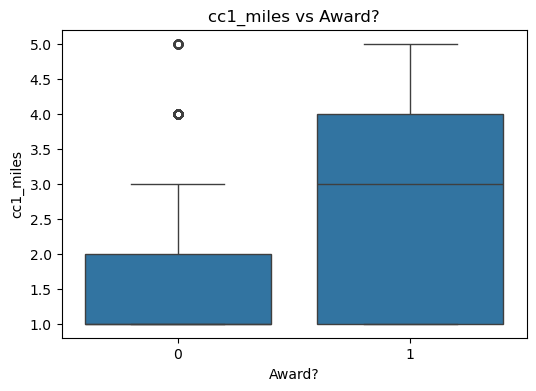

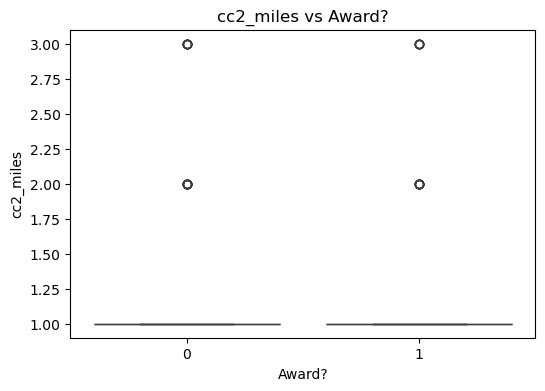

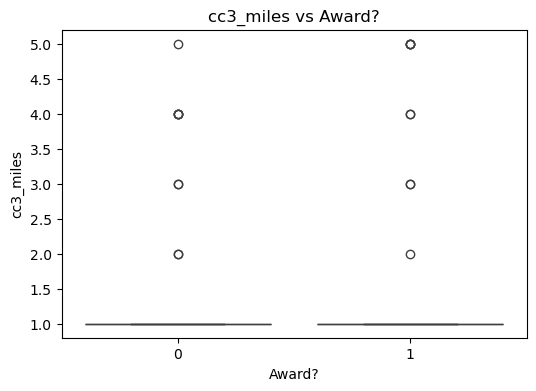

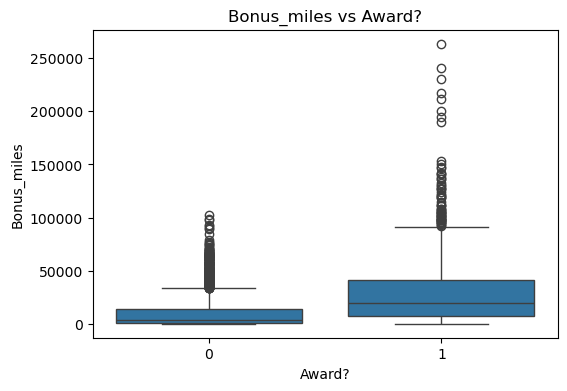

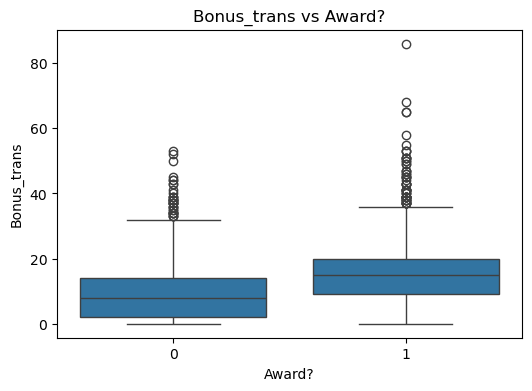

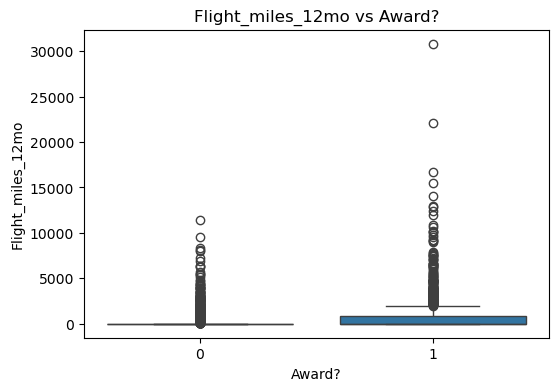

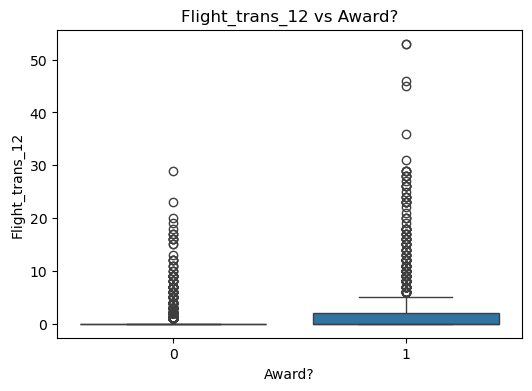

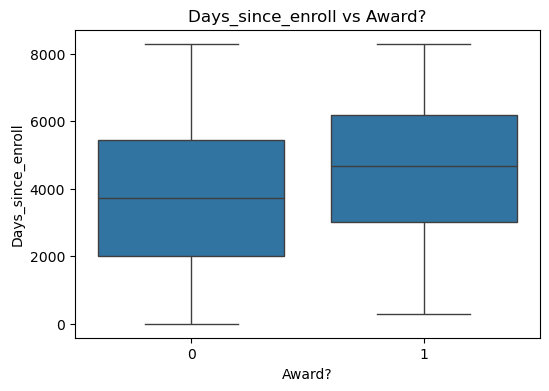

In [9]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Award?', y=col, data=df)
    plt.title(f"{col} vs Award?")
    plt.show()


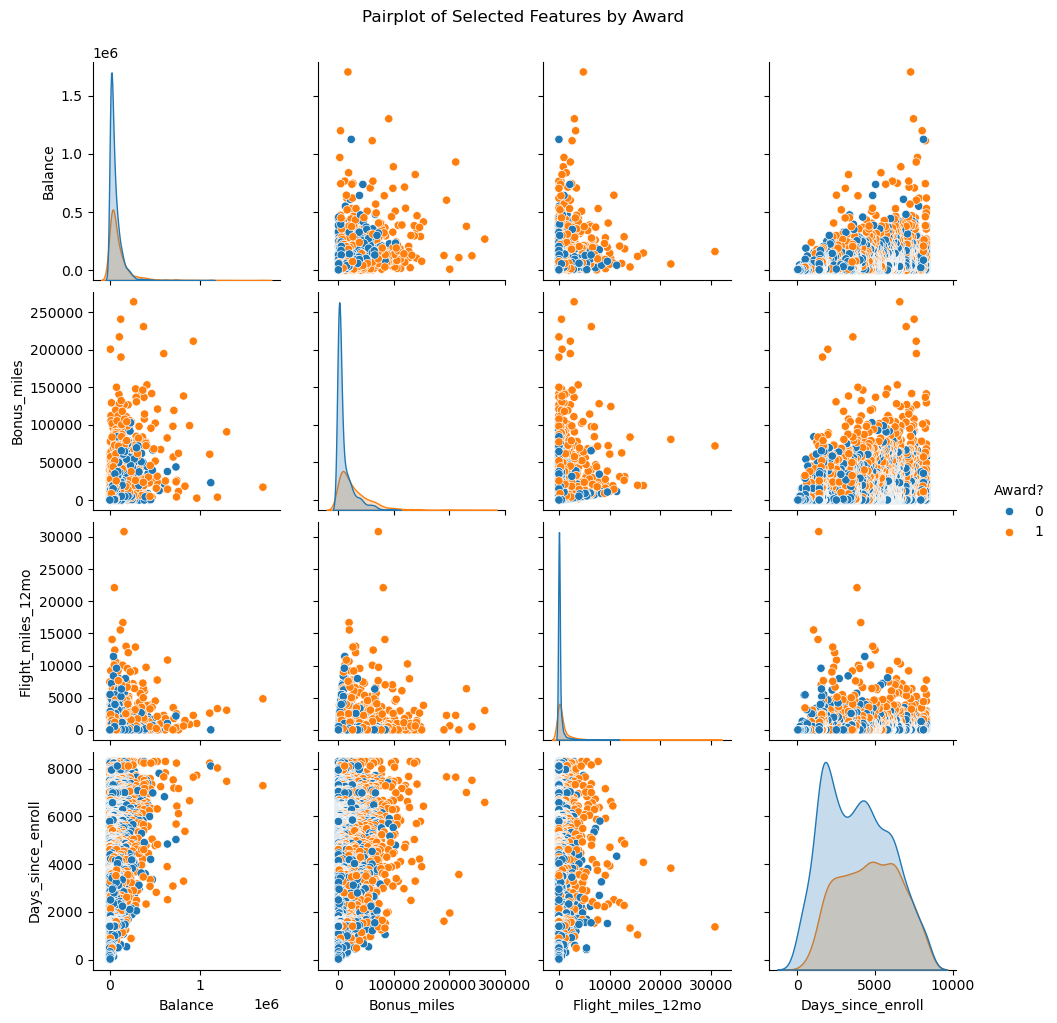

In [10]:
selected_cols = ['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll', 'Award?']

sns.pairplot(df[selected_cols], hue='Award?', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features by Award", y=1.02)
plt.show()


In [11]:
# Step 3: Preprocess
df_original = df.copy()
df.drop(['ID#'], axis=1, inplace=True)

In [12]:

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [13]:
# Apply KMeans clustering and find optimal k using Elbow method
inertia = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)


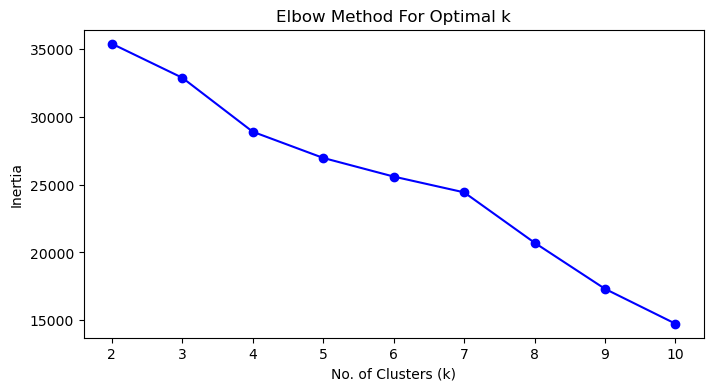

In [14]:
# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [15]:
#  Apply KMeans with optimal k (say, k=5 based on elbow)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Add cluster column and analyze
df_clustered = pd.concat([df_original, df['KMeans_Cluster']], axis=1)
df_clustered.groupby('KMeans_Cluster').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
KMeans_Cluster,,,,,,,,,,,,
0,1945.497020,58124.779499,193.427890,1.699642,1.019070,1.000000,10816.562574,10.760429,417.281287,1.258641,4271.570918,1.000000
1,1563.870392,139193.010702,145.376932,4.195006,1.002378,1.057075,51174.633769,20.095125,383.443520,1.166468,4938.801427,0.625446
2,1158.110212,59918.329626,70.803842,1.495450,1.020222,1.001011,6402.407482,8.601618,177.680485,0.528817,5632.927199,0.000000
3,3127.675379,34546.727656,93.012648,1.247049,1.011804,1.000000,4428.688027,6.623946,141.472175,0.424958,2101.258853,0.000000
4,1770.708333,196333.680556,773.805556,2.250000,1.041667,1.000000,33783.833333,28.506944,5719.972222,16.868056,4650.562500,0.805556


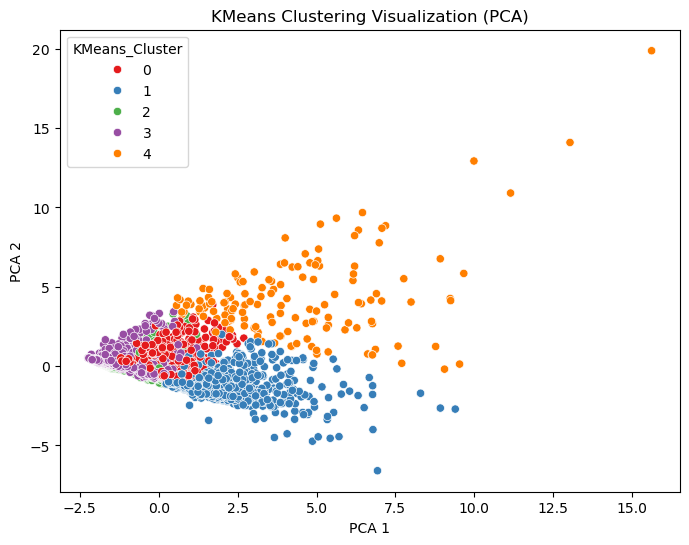

In [16]:
#  Visualize clusters using PCA for 2D plot (optional)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['KMeans_Cluster'], palette='Set1')
plt.title('KMeans Clustering Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.8, min_samples=5)  # You may tune eps based on results
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Count of clusters (excluding noise)
df['DBSCAN_Cluster'].value_counts()


In [ ]:
#  Visualize DBSCAN clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [ ]:
 #Which method performs better and why?

# KMeans performs better in this scenario as:
# - It forms more balanced and interpretable clusters.
# - DBSCAN identifies outliers (label -1) but may group too many points as noise or into a single cluster,
#   especially if `eps` isn't well tuned.
# - Silhouette score can help evaluate clustering quality.

In [ ]:
kmeans_score = silhouette_score(scaled_data, df['KMeans_Cluster'])
try:
    dbscan_score = silhouette_score(scaled_data, df['DBSCAN_Cluster'])
except:
    dbscan_score = "Not computable (due to too many -1 labels)"

print("Silhouette Score for KMeans:", kmeans_score)
print("Silhouette Score for DBSCAN:", dbscan_score)

In [ ]:
# conclusion:
# KMeans is generally preferred when you expect spherical clusters and want clear segmentation.
# DBSCAN is better for noisy datasets with irregular cluster shapes.